In [1]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

In [2]:
#  função van der pol
def van_der_pol(t, z, mu):
    x, dxdt = z  
    dzdt = [dxdt, mu * (1 - x**2) * dxdt - x]
    return dzdt


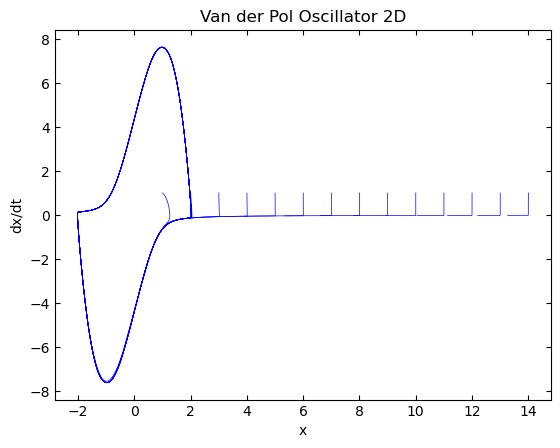

In [6]:
# parametros
mu = 5 ## estabilizando o mu vê melhor a forma do sistema 'how sharp'

z0 = [1.0, 1.0]  # posição e velocidade inicial

# Time points to solve for (from 0 to 50 with 1000 points)
t = np.linspace(0, 50, 5000)

while z0[0] < 15:
    sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
    x = sol.y[0] #posição
    y = sol.y[1] #velocidade
    plt.plot(x, y, 'b', linewidth=0.5)
    #mu += 0.5
    z0[0] += 1

    
# sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
# x = sol.y[0]
# y = sol.y[1]
# plt.plot(x, y, 'b', linewidth=0.5)
    
#plt.figure(figsize=(8, 6))
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Van der Pol Oscillator 2D')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.show()


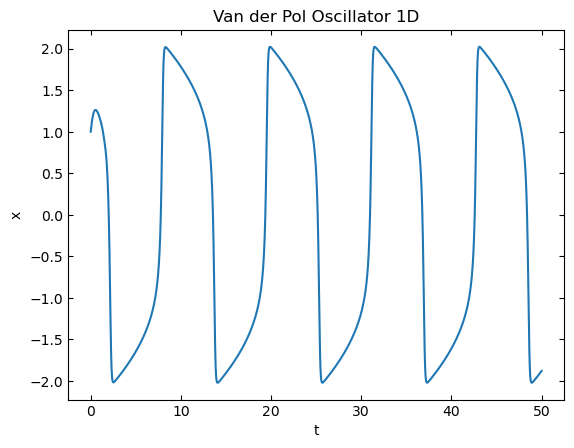

In [14]:
mu = 5

z0 = [1.0, 1.0]
sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
x = sol.y[0]
y = sol.y[1]

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Van der Pol Oscillator 1D')
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, label='Posição (x)')


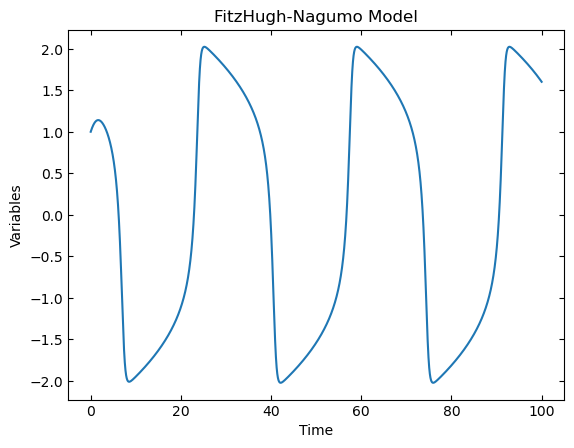

In [4]:
# FitzHugh-Nagumo model parameters
## 2
epsilon = .08
a = 0.0
b = 0.0

# Define the FitzHugh-Nagumo equations
def fitzhugh_nagumo(X, t):
    V, W = X
    dVdt = V - (V**3) / 3 - W + I
    dWdt = epsilon * (V + a - b * W)
    return [dVdt, dWdt]

# Initial conditions
V0 = 1.0
W0 = 1.0
X0 = [V0, W0]

# Time points for integration
t = np.linspace(0, 100, 10000)  # from 0 to 100 with 10000 points

I = 0.5

sol = odeint(fitzhugh_nagumo, X0, t)

# Extract solutions for V and W
V = sol[:, 0]
W = sol[:, 1]



#plt.figure(figsize=(10, 6))
plt.plot(t, V, label='V (Voltage)')
#plt.plot(t, W, label='W (Recovery)')
#plt.plot(V, W, label='Phase Portrait', color='b')
#plt.scatter(V[0], W[0], color='r', label='Initial State')

#plt.plot(V, W, label='Phase Portrait', color='b', linewidth = 2)
plt.title('FitzHugh-Nagumo Model')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
#plt.legend()
plt.show()


Text(0, 0.5, 'Recovery variable, W')

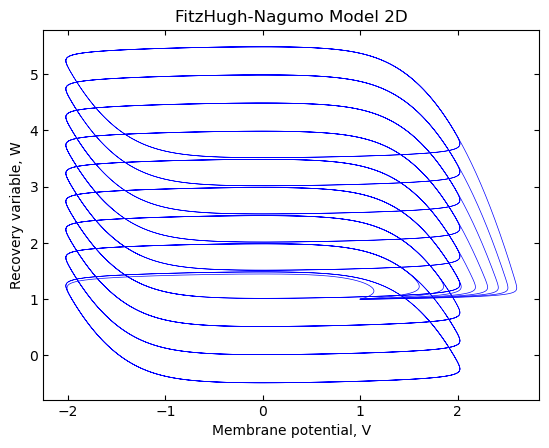

In [5]:
## ?????
while I < 5:
    sol = odeint(fitzhugh_nagumo, X0, t)

    V = sol[:, 0]
    W = sol[:, 1]
    plt.plot(V, W, label='Phase Portrait', color='b', linewidth = 0.5)
    I += 0.5 

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('FitzHugh-Nagumo Model 2D')
plt.xlabel('Membrane potential, V')
plt.ylabel('Recovery variable, W')